Importing the Dependencies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Loading the dataset to the pandas Dataframe.
wine_dataset = pd.read_csv('/content/winequality-red.csv')


In [ ]:
#number of rows and columns in the dataset.
wine_dataset.shape

(1599, 12)

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#checking for missing values.
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis And Visualization.

In [ ]:
#statistical measures of the dataset.
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


'\nsns.countplot(x="quality", data=wine_dataset)\n\nor\n\ncounts = wine_dataset[\'quality\'].value_counts().sort_index()\nplt.bar(counts.index, counts.values)\nplt.xlabel("Quality")\nplt.ylabel("Count")\nplt.title("Count of Wine Quality Ratings")\nplt.show()\n'

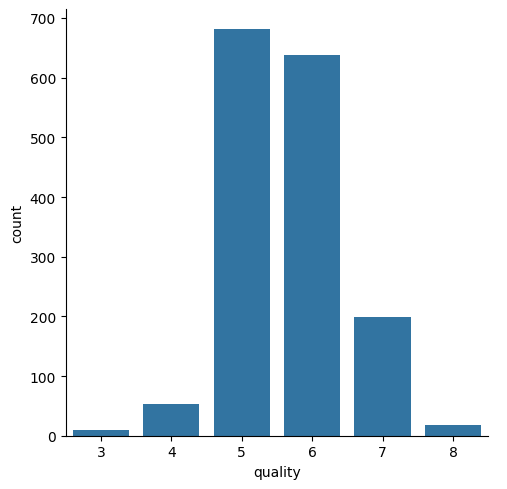

In [ ]:
#number of values for each quality.
sns.catplot(x = "quality", data = wine_dataset, kind = "count")


#or
'''
sns.countplot(x="quality", data=wine_dataset)

(or)

counts = wine_dataset['quality'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Count of Wine Quality Ratings")
plt.show()
'''

<Axes: xlabel='quality', ylabel='volatile acidity'>

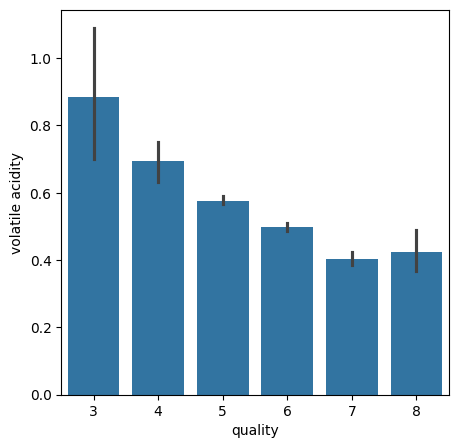

In [ ]:
# Volatile acidity vs Quality.
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "volatile acidity", data = wine_dataset)

#High the volatile acidity , low the wine quality.

<Axes: xlabel='quality', ylabel='citric acid'>

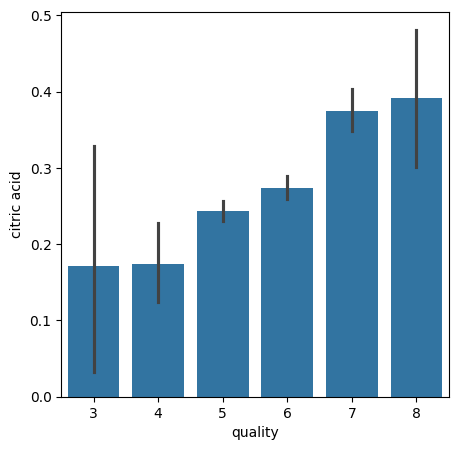

In [ ]:
# citric acid vs Quality.
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "citric acid", data = wine_dataset)

#High the citric acid , high the wine quality.

<Axes: xlabel='quality', ylabel='residual sugar'>

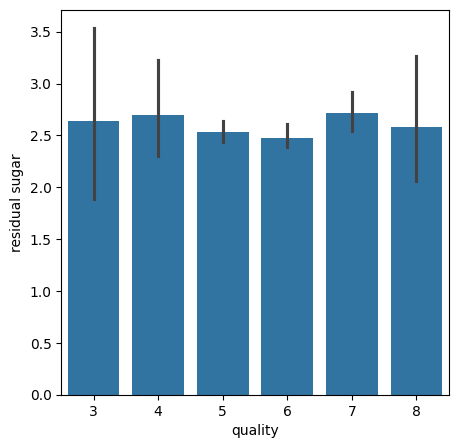

In [ ]:
# residual sugar vs Quality.
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "residual sugar", data = wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

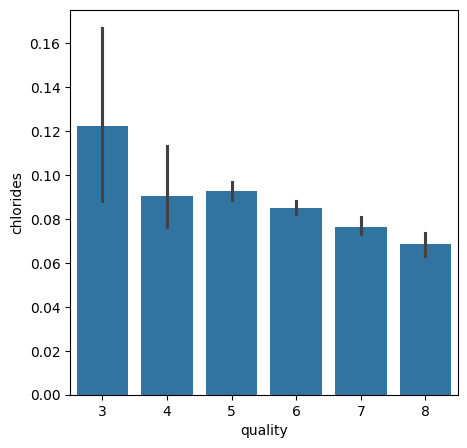

In [ ]:
# chlorides vs Quality.
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "chlorides", data = wine_dataset)

Correlation
1. Positive Correlation.
2. Negative Correlation.

In [ ]:
correlation = wine_dataset.corr()

<Axes: >

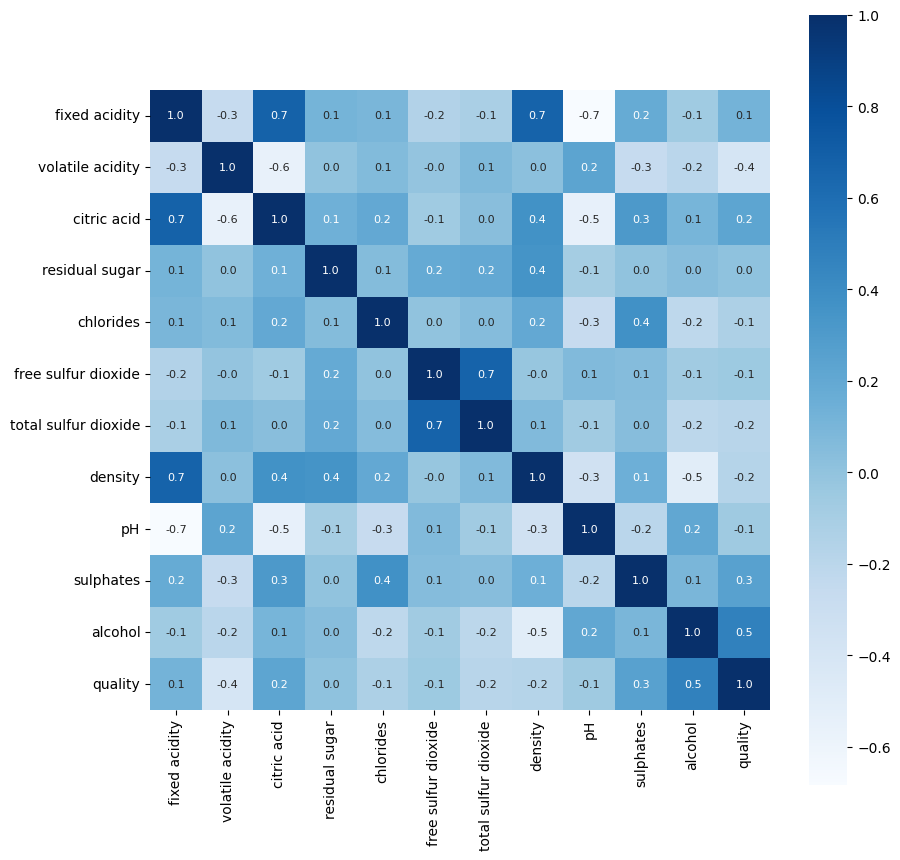

In [ ]:
#constructing a heatmap to understand the correlation between the columns.
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f' , annot = True, annot_kws = {'size':8}, cmap = 'Blues')

Data Preprocessing.

In [ ]:
#separate the data and the label.
X = wine_dataset.drop('quality', axis = 1)

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Label Binarization.

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value : 1 if y_value >= 7 else 0)
Y

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


In [ ]:
#printing the rows with the good quality wine.
wine_dataset[Y == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


Train & Test Split.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training Using Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation.

Accuracy-Score

In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy:",test_data_accuracy)

Accuracy: 0.915625


Building a predictive system.

In [ ]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#changing the input data to a numpy array.
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance.
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
#print(prediction)

if(prediction[0] == 1): print("Good Quality Wine")
else:
  print("Bad Quality Wine")

Good Quality Wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
